### Data Preparation

In [1]:
import pandas as pd

Importing the dataframe which includes 503 stocks data, 9 commodities data, 17 Forex data and 3 Macro variables

In [2]:
returns=pd.read_csv('/home/mehedi/Documents/PCA/Data/returns.csv',index_col=0)
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2017-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006839,NaN
2017-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2017-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010760,NaN
2017-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4052 entries, 2017-09-08 to 2023-06-15
Columns: 532 entries, A to Malaysian_crude_oil
dtypes: float64(532)
memory usage: 16.5+ MB


PCA does not permit missing data, so we will remove trading days that do not have observations on at least 90% of the remaining stocks.

In [4]:
# returns = returns.dropna(thresh=int(returns.shape[0] * .1), axis=1)
returns = returns.dropna(thresh=int(returns.shape[1] * .9))
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 2018-01-03 to 2023-05-30
Columns: 532 entries, A to Malaysian_crude_oil
dtypes: float64(532)
memory usage: 5.5+ MB


In [5]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,NaN,0.015328,-0.017370,NaN,NaN,NaN,0.0,0.000000,0.0,0.015873
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,NaN,0.002868,-0.012626,NaN,NaN,NaN,0.0,0.019851,0.0,-0.002734
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,NaN,-0.004968,0.007673,NaN,NaN,NaN,0.0,0.000664,0.0,-0.004700
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,NaN,0.003782,0.002538,NaN,NaN,NaN,0.0,0.000000,0.0,0.006297
2018-01-09,0.024554,-0.000959,-0.008080,-0.000115,0.007538,0.006398,0.001700,-0.012900,0.003335,0.008971,...,NaN,0.013866,-0.005063,NaN,NaN,NaN,0.0,0.001105,0.0,-0.017208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.040581,0.059506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PCA is sensitive to outliers so we winsorize the data at the 2.5% and 97.5% quantiles, respectively:

In [6]:
returns = returns.clip(lower=returns.quantile(q=.025),
                       upper=returns.quantile(q=.975),
                       axis=1)

We impute any remaining missing values using the average return for any given trading day:

In [8]:
returns_rolling_avg = returns.rolling(window=10).mean()

# Fill missing values with the rolling average
returns = returns.apply(lambda x: x.fillna(x.mean()))

In [10]:
daily_avg = returns.mean(1)
returns = returns.apply(lambda x: x.fillna(daily_avg))

In [9]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,NaN,0.015328,-0.017370,0.000618,0.000301,0.000584,0.000000,0.000000,0.000000,0.015873
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,NaN,0.002868,-0.012626,0.000618,0.000301,0.000584,0.000000,0.019851,0.000000,-0.002734
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,NaN,-0.004968,0.007673,0.000618,0.000301,0.000584,0.000000,0.000664,0.000000,-0.004700
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,NaN,0.003782,0.002538,0.000618,0.000301,0.000584,0.000000,0.000000,0.000000,0.006297
2018-01-09,0.024554,-0.000959,-0.008080,-0.000115,0.007538,0.006398,0.001700,-0.012900,0.003335,0.008971,...,NaN,0.013866,-0.005063,0.000618,0.000301,0.000584,0.000000,0.001105,0.000000,-0.017208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,NaN,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522
2023-05-24,-0.036623,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,NaN,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.043790,...,NaN,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.037031,0.043790,...,NaN,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522


### PCA Analysis

In [10]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FuncFormatter

In [11]:
returns.index=pd.to_datetime(returns.index)

In [12]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 2018-01-03 to 2023-05-30
Columns: 532 entries, A to Malaysian_crude_oil
dtypes: float64(532)
memory usage: 5.5 MB


In [13]:
cov = returns.cov()

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


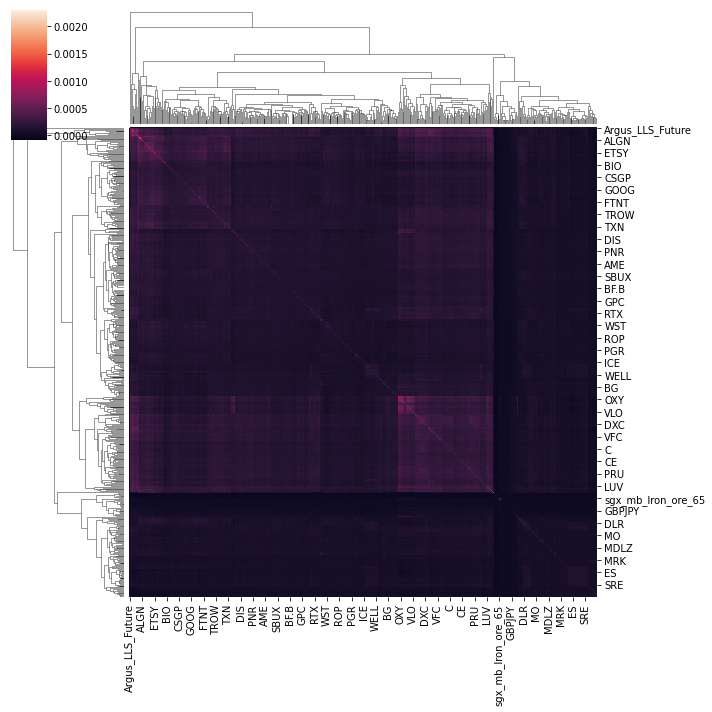

In [14]:
sns.clustermap(cov)


In [15]:
pca = PCA()
pca.fit(returns)
pd.Series(pca.explained_variance_ratio_).to_frame('Explained Variance').head().style.format('{:,.2%}'.format)

,Explained Variance
0,38.66%
1,6.68%
2,3.95%
3,2.76%
4,1.90%


Next, we select and normalize the four largest components so that they sum to 1 and we can use them as weights for portfolios that we can compare to an equal-weighted portfolio formed from all stocks::

In [16]:
top4 = pd.DataFrame(pca.components_[:4], columns=cov.columns)
eigen_portfolios = top4.div(top4.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range(1, 5)]


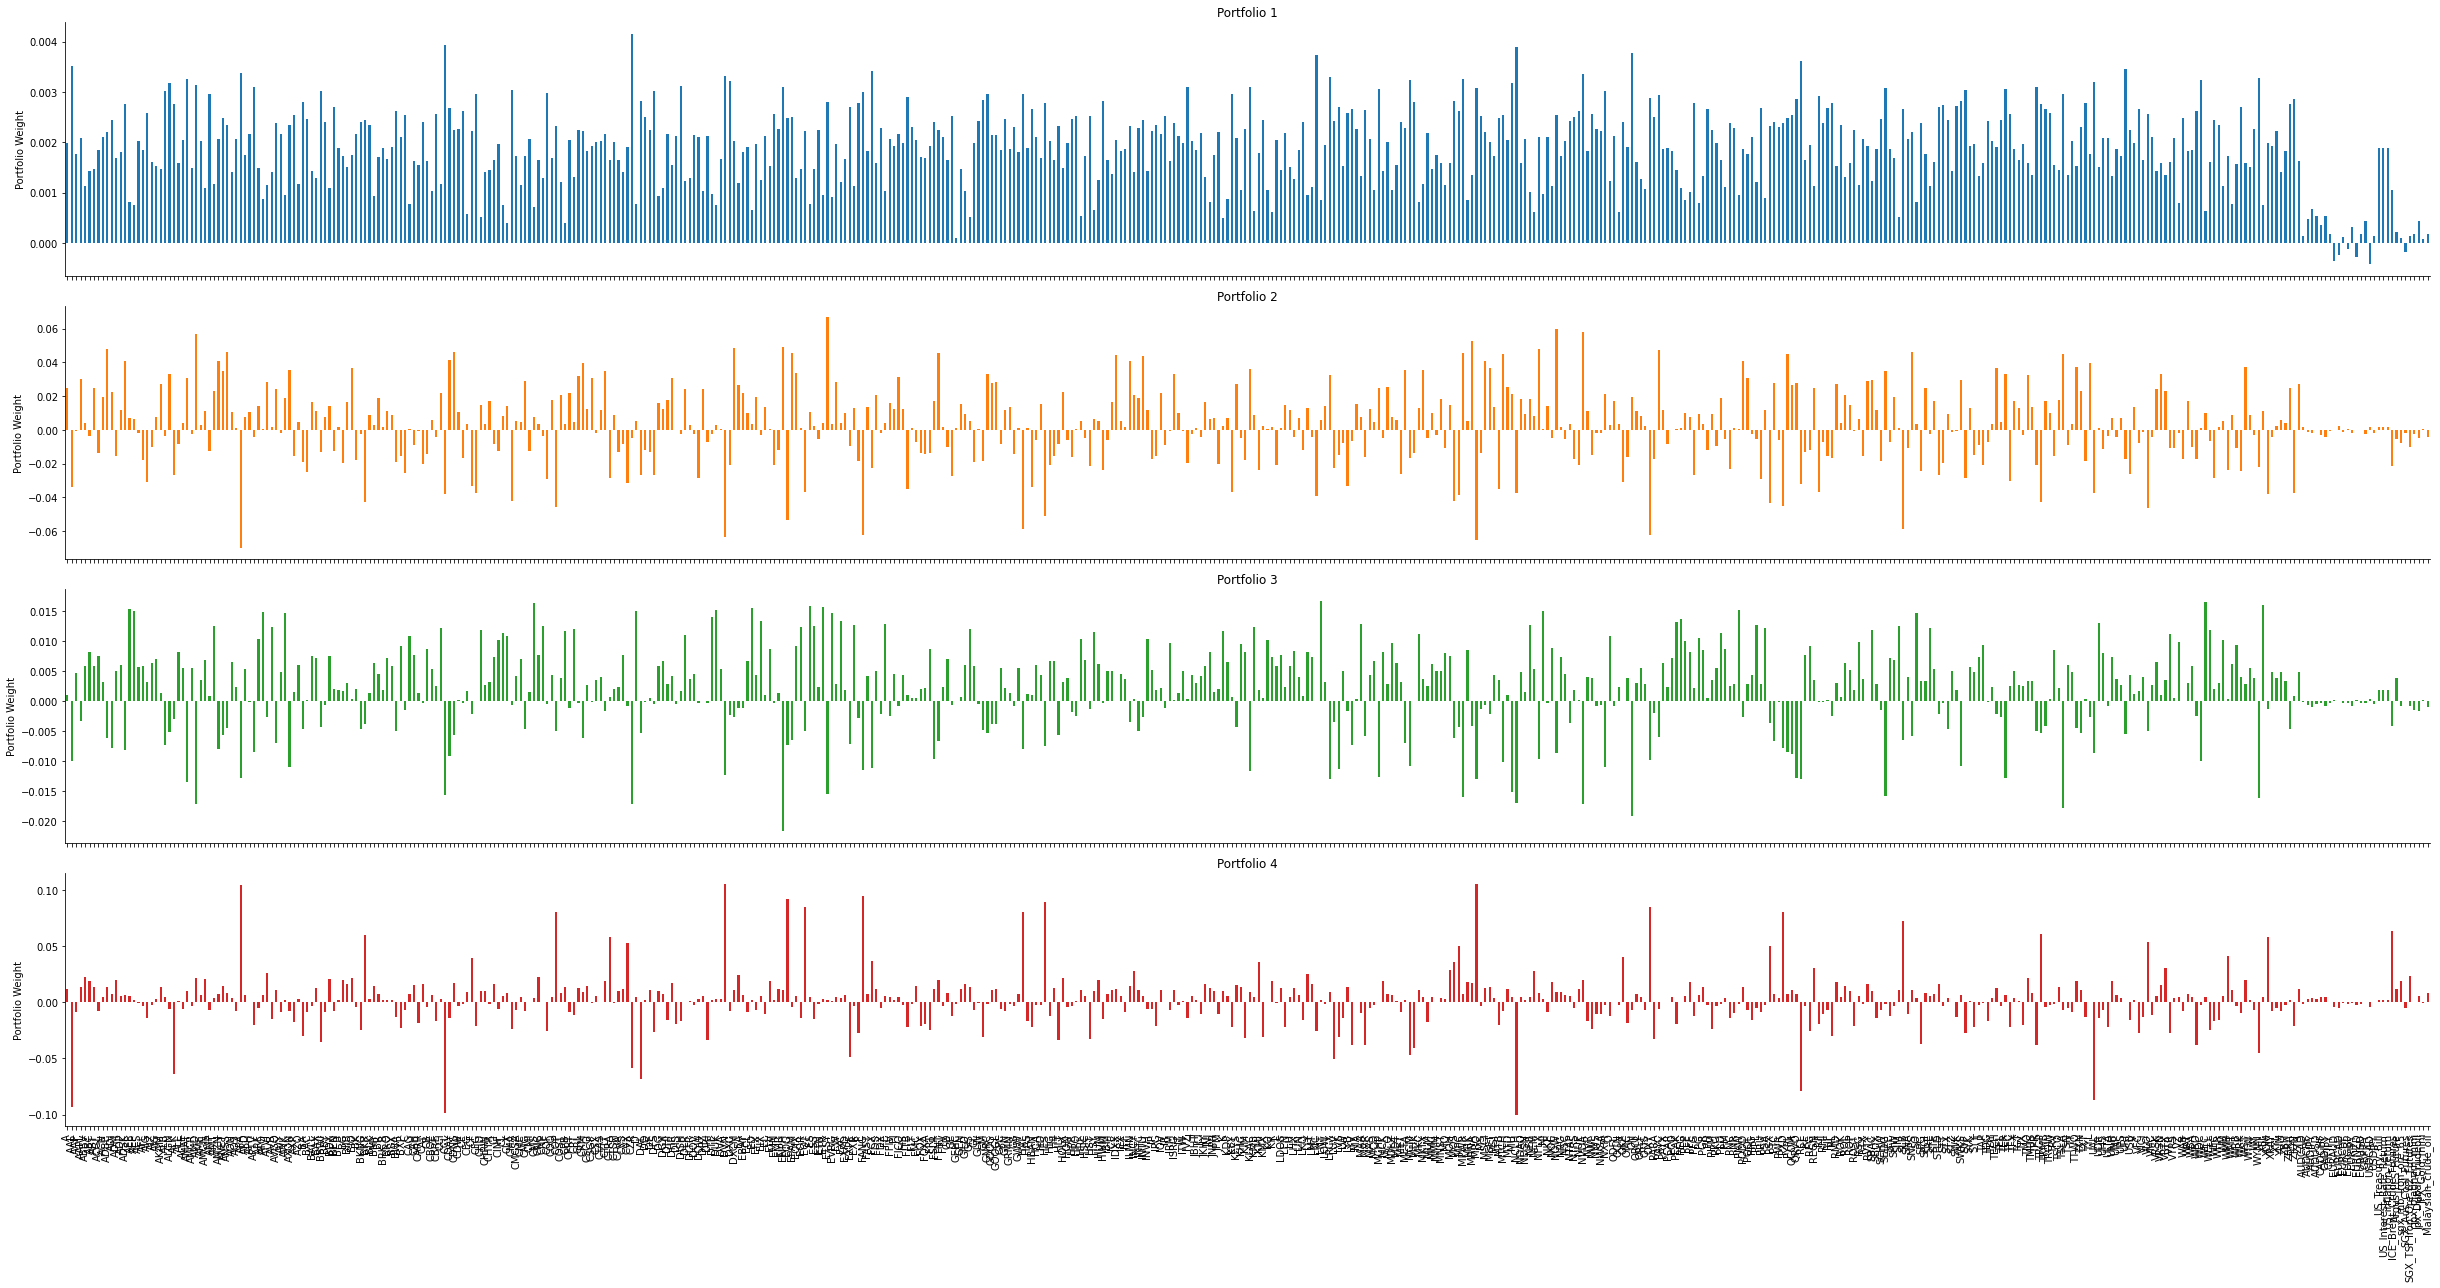

In [17]:
axes = eigen_portfolios.T.plot.bar(subplots=True,
                                   layout=(4, 1),
                                   figsize=(34, 18),
                                   legend=False)
for ax in axes.flatten():
    ax.set_ylabel('Portfolio Weight')
    ax.set_xlabel('')
sns.despine()
plt.tight_layout()

### Eigenportfolio Performance

When comparing the performance of each portfolio over the sample period to ‘the market’ consisting of our small sample, we find that portfolio 1 performs very similarly, whereas the other portfolios capture different return patterns.

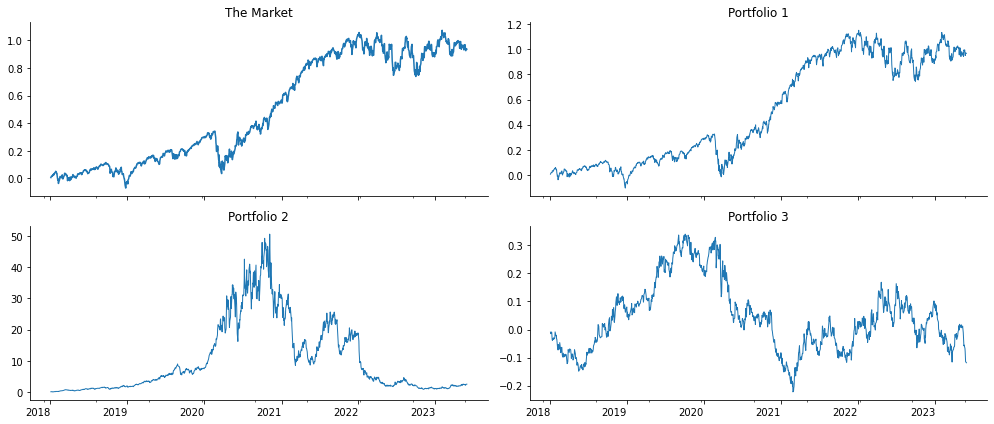

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6), sharex=True)
axes = axes.flatten()
returns.mean(1).add(1).cumprod().sub(1).plot(title='The Market', ax=axes[0])
for i in range(3):
    rc = returns.mul(eigen_portfolios.iloc[i]).sum(1).add(1).cumprod().sub(1)
    rc.plot(title=f'Portfolio {i+1}', ax=axes[i+1], lw=1, rot=0)

for i in range(4):
    axes[i].set_xlabel('')
sns.despine()
fig.tight_layout()

### PCA risk and factor models

In [19]:

import datetime
train_end = datetime.datetime(2021, 3, 26) 

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = returns[returns.index <= train_end].copy()
df_test = returns[returns.index > train_end].copy()

# df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
# df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (813, 532)
Test dataset: (547, 532)


In [20]:
# Computing for normalized returns
cov_matrix = df_train.cov()
pca = PCA()
pca.fit(cov_matrix)

cov_df = pd.DataFrame({'Variance': np.diag(cov_matrix)}, index=df_train.columns)    
# cumulative variance explained
var_threshold = 0.9
var_explained = np.cumsum(pca.explained_variance_ratio_)
num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

3 components explain 90.00% of variance


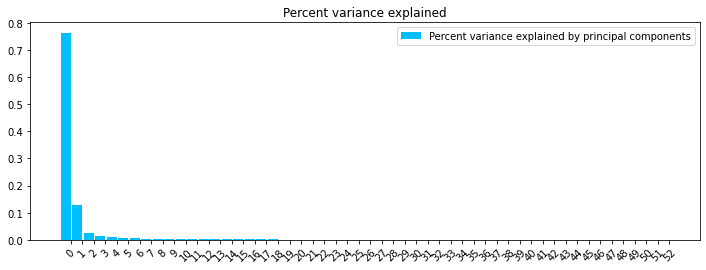

In [21]:
bar_width = 0.9
n_asset = int((1 / 10) * returns.shape[1])
x_indx = np.arange(n_asset)
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
# Eigenvalues are measured as percentage of explained variance.
rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
ax.set_xticks(x_indx + bar_width / 2)
ax.set_xticklabels(list(range(n_asset)), rotation=45)
ax.set_title('Percent variance explained')
ax.legend((rects[0],), ('Percent variance explained by principal components',))

PCA risk factors with Returns

In [22]:
pca_components = 31
pca = PCA(n_components=pca_components)
pca.fit(returns)

PCA(n_components=31)

In [23]:
print('Time varying market factors loadings of dates')
risk_factors = pd.DataFrame(pca.fit_transform(returns), 
                            columns=[f'Principal Component {i+1}' for i in range(pca_components)], 
                            index=returns.index)
risk_factors.head()

Time varying market factors loadings of dates


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 22,Principal Component 23,Principal Component 24,Principal Component 25,Principal Component 26,Principal Component 27,Principal Component 28,Principal Component 29,Principal Component 30,Principal Component 31
2018-01-03,-0.134324,-0.050688,0.056812,0.069247,0.025328,0.027870,-0.020647,-0.012493,-0.024386,-0.040451,...,-0.005187,-0.013700,-0.040345,-0.033025,0.019606,0.005869,0.011176,0.020682,-0.001600,-0.010710
2018-01-04,-0.071897,0.040993,0.033302,0.043653,0.103121,0.036815,-0.065043,-0.006245,-0.027113,-0.029036,...,-0.009685,-0.004621,0.006812,-0.038084,-0.010242,0.026216,-0.063454,0.015158,0.041692,0.011750
2018-01-05,-0.100899,-0.056726,-0.022538,0.010662,0.037602,0.006393,-0.046838,0.008393,-0.036377,-0.002423,...,-0.006266,0.010508,-0.029165,0.005199,0.002158,-0.001432,-0.003172,-0.014482,0.001731,-0.002552
2018-01-08,-0.060689,-0.055572,-0.013787,0.037927,-0.010250,-0.006564,0.010978,-0.031992,0.005419,-0.001703,...,-0.018689,0.042355,0.003191,-0.017282,0.059758,0.032155,-0.001113,-0.027305,0.055361,-0.023112
2018-01-09,-0.002988,0.011450,0.009305,-0.017424,0.076166,0.037091,-0.089726,0.071877,-0.017878,-0.005958,...,0.006409,0.002135,0.010181,-0.018159,0.011504,-0.010937,-0.007697,0.026741,-0.019805,-0.006446


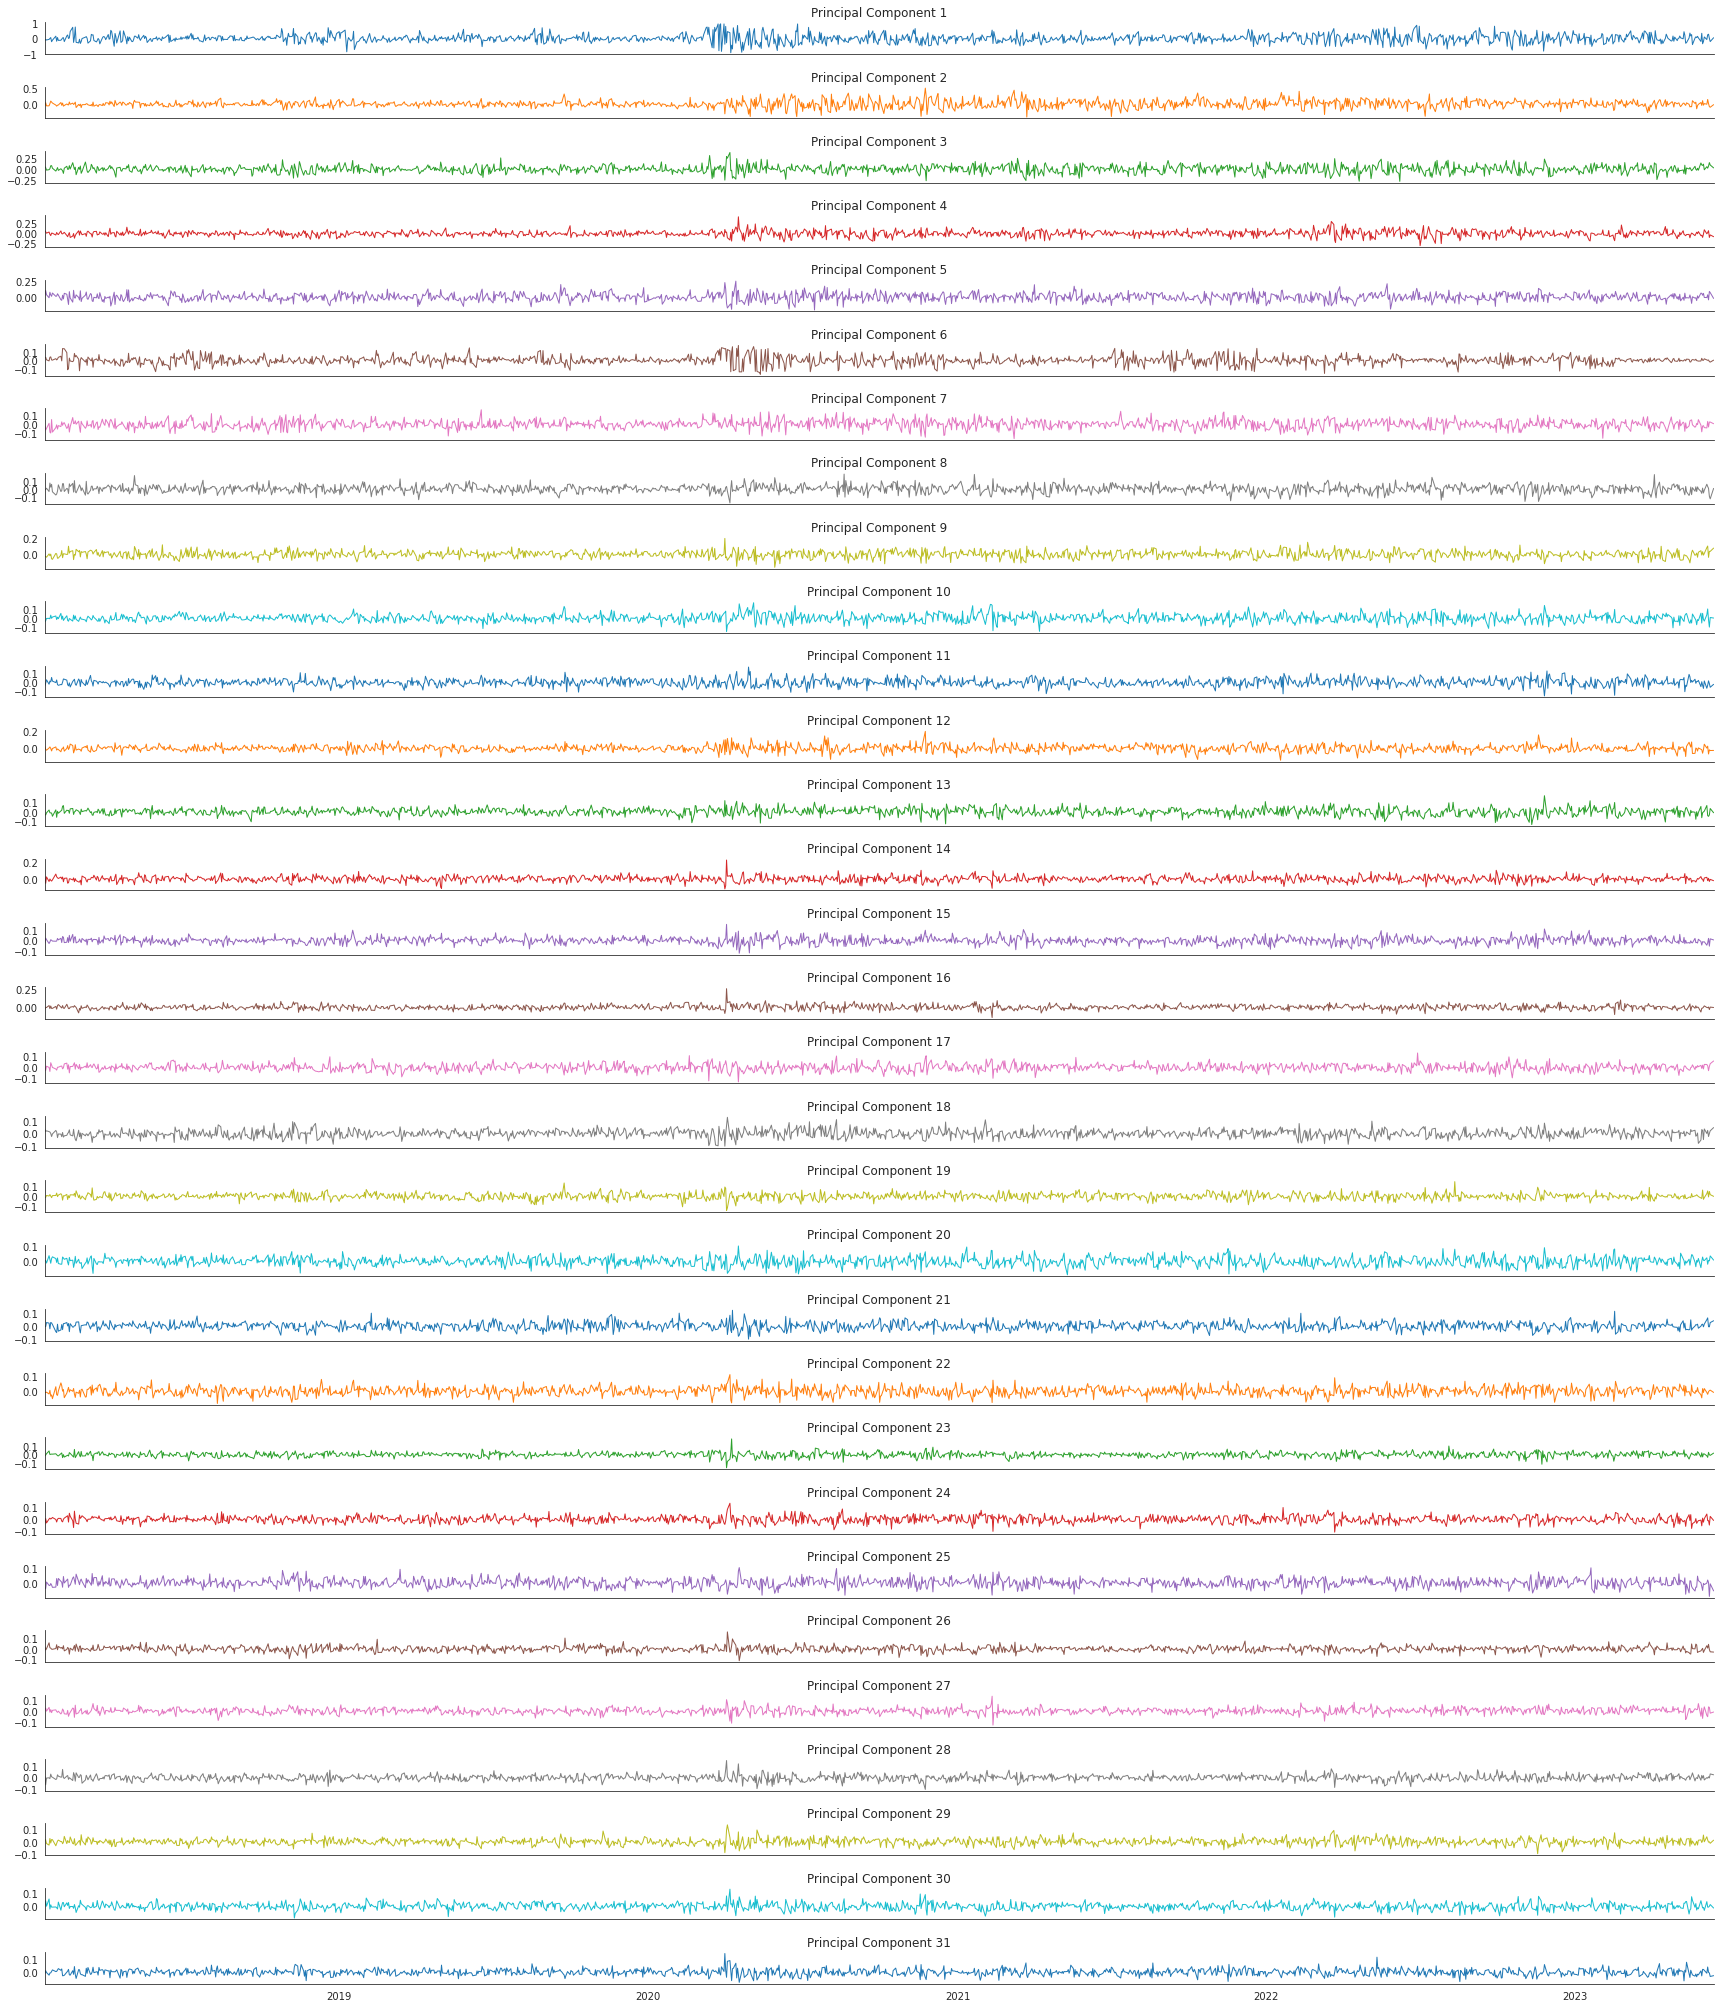

In [24]:
with sns.axes_style('white'):
    risk_factors.plot(subplots=True,
                      figsize=(24, 28),
                      title=risk_factors.columns.tolist(),
                      legend=False,
                      rot=0,
                      lw=1,
                      xlim=(risk_factors.index.min(),
                            risk_factors.index.max()))

    sns.despine()
    plt.tight_layout()

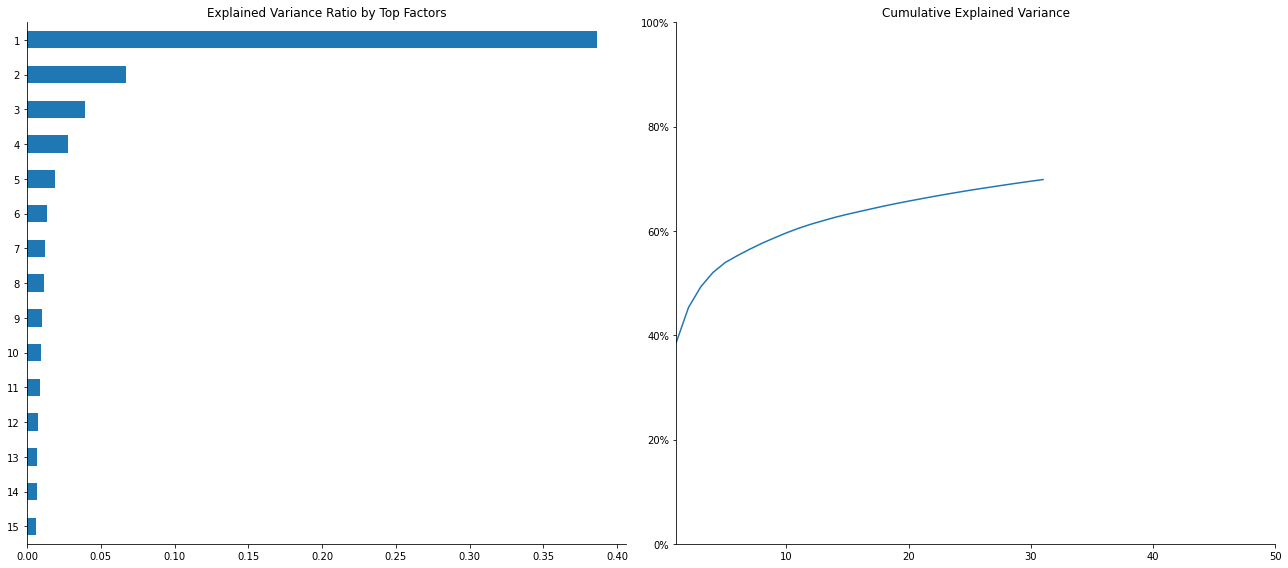

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
title = 'Explained Variance Ratio by Top Factors'
var_expl = pd.Series(pca.explained_variance_ratio_)
var_expl.index += 1
var_expl.iloc[:15].sort_values().plot.barh(title=title,
                                           ax=axes[0])
var_expl.cumsum().plot(ylim=(0, 1),
                       ax=axes[1],
                       title='Cumulative Explained Variance',
                       xlim=(1, 50))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
sns.despine()
fig.tight_layout()

### Simulation for larger number of stocks

In [26]:
pca = PCA()
n_trials, n_samples = 100, 500
explained = np.empty(shape=(n_trials, n_samples))
for trial in range(n_trials):
    returns_sample = returns.sample(n=n_samples)
    returns_sample = returns_sample.dropna(thresh=int(returns_sample.shape[0] * .95), axis=1)
    returns_sample = returns_sample.dropna(thresh=int(returns_sample.shape[1] * .95))
    daily_avg = returns_sample.mean(1)
    returns_sample = returns_sample.apply(lambda x: x.fillna(daily_avg))
    pca.fit(returns_sample)
    explained[trial, :len(pca.components_)] = pca.explained_variance_ratio_

In [27]:
explained = pd.DataFrame(explained, columns=list(range(1, explained.shape[1] + 1)))
explained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 500 entries, 1 to 500
dtypes: float64(500)
memory usage: 390.8 KB


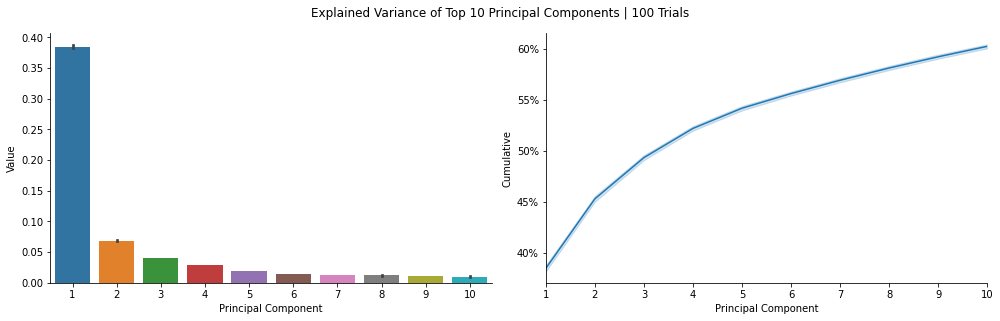

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4.5))
pc10 = explained.iloc[:, :10].stack().reset_index()
pc10.columns = ['Trial', 'Principal Component', 'Value']

pc10['Cumulative'] = pc10.groupby('Trial').Value.transform(np.cumsum)
sns.barplot(x='Principal Component', y='Value', data=pc10, ax=axes[0])
sns.lineplot(x='Principal Component', y='Cumulative', data=pc10, ax=axes[1])
axes[1].set_xlim(1, 10)
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
fig.suptitle('Explained Variance of Top 10 Principal Components | 100 Trials')
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.90)

### Step 1 Alt: Cluster by loadings

In [85]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,US_inflation_return,ICE_Brent_Crude_Futures,Argus_LLS_Future,sgx_mb_Iron_ore_65,SGX_Aus_Coal_Futures,SGX_TSI_Iron_Ore_62_Futures,jpx_platinum_mini,Jpx_Dubai_Crudeoil,JPX_Gold_mini,Malaysian_crude_oil
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,0.005543,0.015328,-0.017370,0.000618,0.000301,0.000584,0.000000,0.000000,0.000000,0.015873
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.003078,0.002868,-0.012626,0.000618,0.000301,0.000584,0.000000,0.019851,0.000000,-0.002734
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.005086,-0.004968,0.007673,0.000618,0.000301,0.000584,0.000000,0.000664,0.000000,-0.004700
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,0.003298,0.003782,0.002538,0.000618,0.000301,0.000584,0.000000,0.000000,0.000000,0.006297
2018-01-09,0.024554,-0.000959,-0.008080,-0.000115,0.007538,0.006398,0.001700,-0.012900,0.003335,0.008971,...,0.000310,0.013866,-0.005063,0.000618,0.000301,0.000584,0.000000,0.001105,0.000000,-0.017208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.009644,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522
2023-05-24,-0.036623,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.010726,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.043790,...,-0.001553,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.037031,0.043790,...,0.007538,0.000600,0.000188,0.000618,0.000301,0.000584,0.000269,0.000538,0.000397,0.000522


In [86]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(returns)

In [87]:
pca = PCA(n_components=10)
loadings = pca.fit_transform(returns)

In [88]:
pca.explained_variance_

array([0.06996311, 0.01209728, 0.00714297, 0.00499042, 0.00344278,
       0.00239948, 0.00221304, 0.00205116, 0.00184828, 0.00177345])

Sum of weights of first eigen-portfolio: 1.00


<AxesSubplot:title={'center':'First eigen-portfolio weights'}>

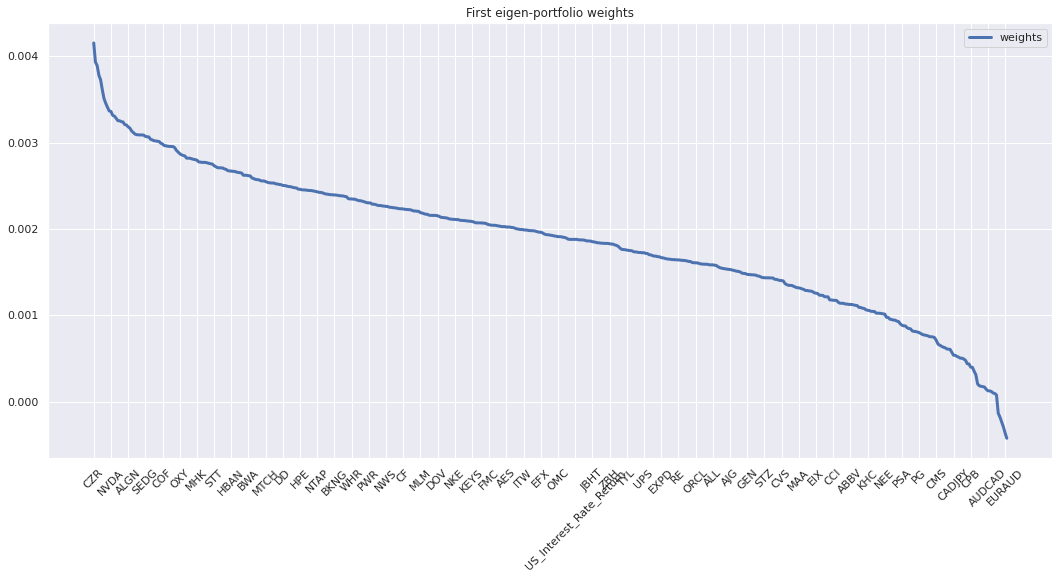

In [89]:
# getting the principal components of fitted pca model

pcs = pca.components_
normalized_pcs = list()

# normalized to put in the form of portfolio weights
for eigen_vector in pcs:
    # scaling  values to sum to 1 
    normalized_values = eigen_vector / eigen_vector.sum()
    normalized_pcs.append(normalized_values)

    
pc_w = normalized_pcs[0]

eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()}, index = returns.columns)
eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
eigen_prtf1.plot(title='First eigen-portfolio weights', 
                 figsize=(18,8), 
                 xticks=range(0, len(returns.columns),10), 
                 rot=45, 
                     linewidth=3)

In [34]:
pcs.shape

(10, 532)

Sum of weights of second eigen-portfolio: 1.00


<AxesSubplot:title={'center':'Second eigen-portfolio weights'}>

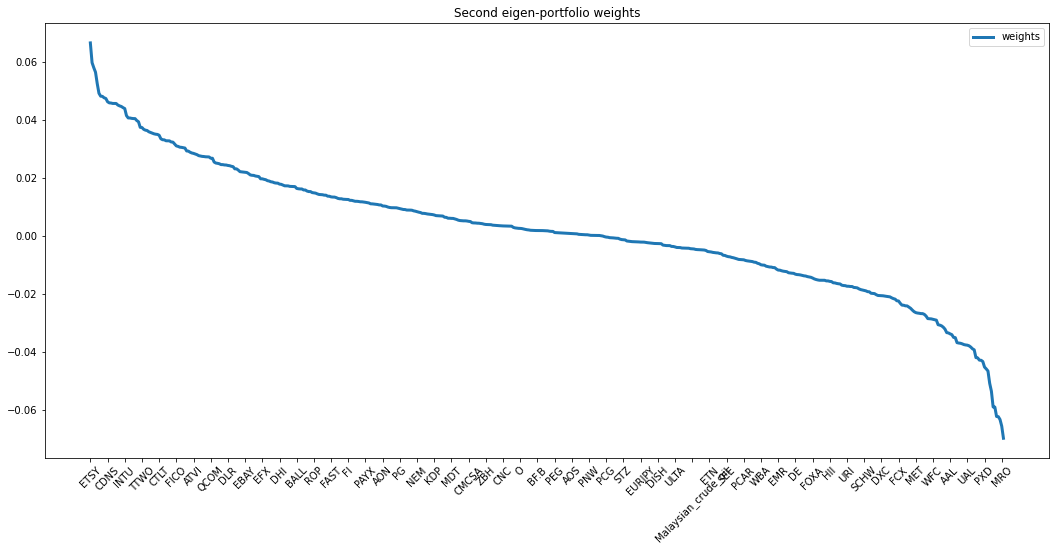

In [35]:
# Computing weights for second eigenportfolio
pc_w_2 = normalized_pcs[1]
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w_2.squeeze()}, index = returns.columns)


eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
eigen_prtf2.plot(title='Second eigen-portfolio weights',
                 figsize=(18,8), 
                 xticks=range(0, len(returns.columns),10), 
                 rot=45, 
                 linewidth=3)

### Clustering with all

In [90]:
wghts = pd.DataFrame(pca.components_.T* np.sqrt(pca.explained_variance_), index=returns.columns, columns=[f"PC{i+1}" for i in range(len(pca.components_))])


In [91]:
wghts

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
A,-0.011222,-0.005400,-0.000538,0.001533,0.001223,0.000999,-0.001162,0.001467,-0.000831,-0.000225
AAL,-0.019740,0.007322,0.005167,-0.012388,-0.003670,0.001161,-0.001005,-0.002971,-0.000664,0.001228
AAP,-0.009927,0.000143,-0.002453,-0.001087,0.001210,0.000204,0.001178,0.001464,-0.003266,0.001206
AAPL,-0.011713,-0.006576,0.001745,0.001795,0.000208,-0.000117,-0.000615,-0.002360,0.000343,0.000221
ABBV,-0.006335,-0.000933,-0.003017,0.002982,0.001184,0.001194,-0.002391,-0.000281,-0.000895,0.000920
...,...,...,...,...,...,...,...,...,...,...
SGX_TSI_Iron_Ore_62_Futures,-0.000813,0.002176,0.000412,0.003167,-0.001025,-0.001434,-0.000936,0.000045,-0.000252,0.000019
jpx_platinum_mini,-0.001038,0.000572,0.000802,0.000043,-0.000412,-0.000864,-0.000276,0.000229,-0.001019,0.000085
Jpx_Dubai_Crudeoil,-0.002474,0.001046,0.000904,0.000806,-0.000138,-0.000307,-0.001053,-0.000170,-0.000729,-0.000146
JPX_Gold_mini,-0.000439,-0.000039,-0.000047,-0.000038,-0.000177,-0.000173,-0.000079,0.000084,-0.000109,-0.000192


In [92]:
%%capture kltr
# Find optimal number of clusters using elbow method
seed_random = 1
X = wghts
fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 41)
for n_clusters in k_values_to_try:
    
    #Perform clustering.
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=seed_random,
                    )
    labels_clusters = kmeans.fit_predict(X)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    silhouette = silhouette_score(X, labels_clusters)
    # ch = calinski_harabasz_score(X, labels_clusters)
    # db = davies_bouldin_score(X, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  }
    df_scores.append(tmp_scores)

#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
kmeans_scores = pd.DataFrame(df_scores)
kmeans_scores.set_index("n_clusters", inplace=True)

<AxesSubplot:xlabel='n_clusters'>

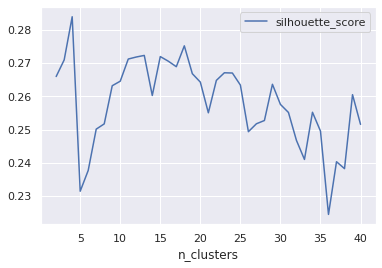

In [93]:
kmeans_scores.plot()

In [94]:
factor_clusters = pd.DataFrame({"cluster" : labels_kmeans[4]}, index=returns.columns)

In [41]:
factor_clusters

,cluster
A,2
AAL,0
AAP,1
AAPL,2
ABBV,1
...,...
SGX_TSI_Iron_Ore_62_Futures,1
jpx_platinum_mini,1
Jpx_Dubai_Crudeoil,1
JPX_Gold_mini,1


In [109]:
grouped_df = factor_clusters.groupby('cluster').apply(lambda x: x.index.tolist())
grouped_df

new_df = pd.DataFrame(grouped_df.tolist()).T

# Generate column names based on the number of clusters
column_names = [f'Cluster {i+1}' for i in range(new_df.shape[1])]

# Rename the columns
new_df.columns = column_names
new_df.head(60)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,AAL,AAP,A,APA
1,ACGL,ABBV,AAPL,BKR
2,AFL,ABC,ADBE,CF
3,AIG,ABT,ADI,COP
4,ALB,ACN,ADSK,CTRA
5,ALK,ADM,ALGN,CVX
6,AMP,ADP,AMAT,DVN
7,AOS,AEE,AMD,EOG
8,APH,AEP,AMZN,EQT
9,APTV,AES,ANET,FANG


In [96]:
for c in range(4):
    # c_stocks = stocks.loc[stocks.cluster==c].index
    print(f'---------------- Cluster {c} stocks----------------')
    dates = factor_clusters.loc[factor_clusters.cluster==c].index
    print(dates)

---------------- Cluster 0 stocks----------------
Index(['AAL', 'ACGL', 'AFL', 'AIG', 'ALB', 'ALK', 'AMP', 'AOS', 'APH', 'APTV',
       ...
       'WAB', 'WBD', 'WDC', 'WFC', 'WHR', 'WRK', 'WY', 'WYNN', 'XYL', 'ZION'],
      dtype='object', length=166)
---------------- Cluster 1 stocks----------------
Index(['AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADM', 'ADP', 'AEE', 'AEP', 'AES',
       ...
       'US_Interest_Rate_Return', 'US_inflation_return', 'Argus_LLS_Future',
       'sgx_mb_Iron_ore_65', 'SGX_Aus_Coal_Futures',
       'SGX_TSI_Iron_Ore_62_Futures', 'jpx_platinum_mini',
       'Jpx_Dubai_Crudeoil', 'JPX_Gold_mini', 'Malaysian_crude_oil'],
      dtype='object', length=256)
---------------- Cluster 2 stocks----------------
Index(['A', 'AAPL', 'ADBE', 'ADI', 'ADSK', 'ALGN', 'AMAT', 'AMD', 'AMZN',
       'ANET', 'ANSS', 'AVGO', 'AXON', 'BIO', 'CDAY', 'CDNS', 'CMG', 'CPRT',
       'CRL', 'CRM', 'CSGP', 'CTLT', 'DXCM', 'EBAY', 'ENPH', 'EPAM', 'ETSY',
       'EW', 'FFIV', 'FICO', 'FSLR', 

In [97]:
sector_df=pd.read_csv('/home/mehedi/Documents/PCA/Data/sector_df.csv',index_col=0)

In [98]:
sector_df

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0
...,...,...,...,...
SGX_TSI_Iron_Ore_62_Futures,SGX_TSI_Iron_Ore_62_Futures,SGX_TSI_Iron_Ore_62_Futures,100000000,16
jpx_platinum_mini,jpx_platinum_mini,jpx_platinum_mini,100000000,17
Jpx_Dubai_Crudeoil,Jpx_Dubai_Crudeoil,Jpx_Dubai_Crudeoil,100000000,18
JPX_Gold_mini,JPX_Gold_mini,JPX_Gold_mini,100000000,19


Mean loading/correlation by industry


/tmp/ipykernel_258389/1971023135.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(weights.groupby('Sector').mean().drop(columns=["SectorCode",'Capitalization']).abs(), cmap='YlGnBu', annot=True)


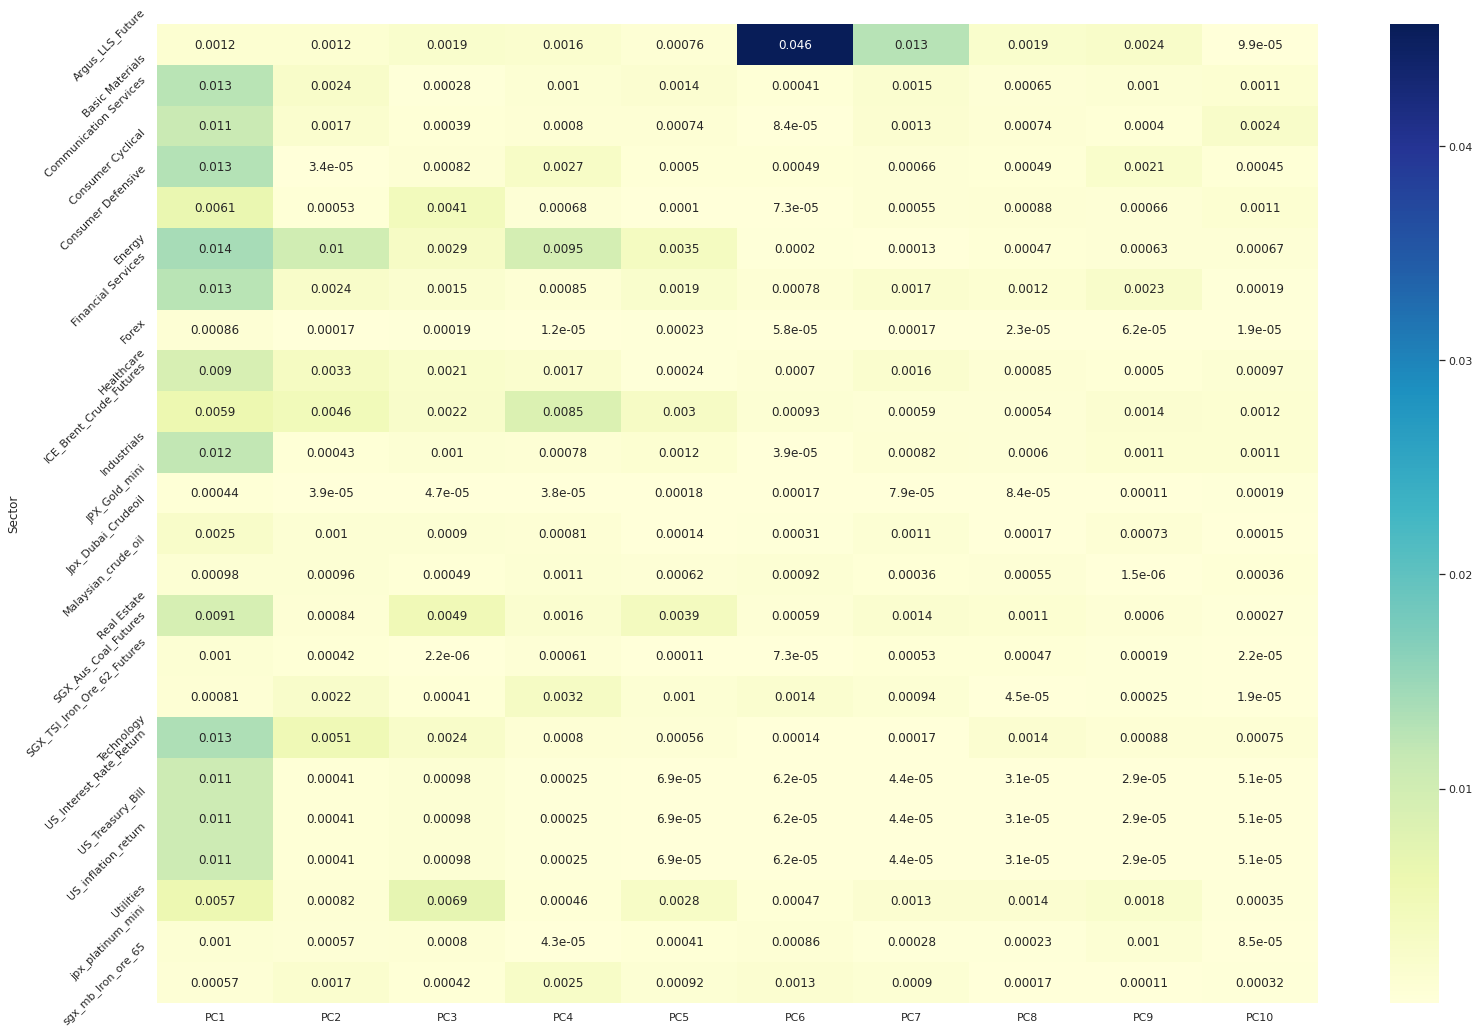

In [100]:
weights = wghts.join(sector_df)

print('Mean loading/correlation by industry')
# Draw as heatmap
fig, ax = plt.subplots(figsize=(26,18))
sns.set()
sns.heatmap(weights.groupby('Sector').mean().drop(columns=["SectorCode",'Capitalization']).abs(), cmap='YlGnBu', annot=True)
plt.yticks(rotation=45)
plt.show()

### Cluster on S&P

In [44]:
import pandas as pd

In [45]:
snp_ret = pd.read_csv('/home/mehedi/Documents/PCA/Machine-Learning-for-Algorithmic-Trading-Second-Edition-master/data/s&preturns.csv',index_col='Date')
snp_ret.index=pd.to_datetime(snp_ret.index)
snp_ret

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [46]:
import yfinance as yf

In [4]:
# ticker_sector = {}

# for ticker in snp_ret.columns:
#     try:
#         ticker_info = yf.Ticker(ticker).info
#         name = ticker_info.get('longName')
#         sector = ticker_info.get('sector')
#         capitalization = ticker_info.get('marketCap')
        
#         if sector and capitalization:
#             ticker_sector[ticker] = {
#                 'Name': name,
#                 'Sector': sector,
#                 'Capitalization': capitalization
#             }
#         else:
#             print(f"Missing sector or capitalization information for {ticker}.")
#     except:
#         print(f"Failed to fetch data for {ticker}.")

# # Create DataFrame from ticker_sector dictionary
# df = pd.DataFrame.from_dict(ticker_sector, orient='index')

# # Generate numerical codes for unique sector values
# df['SectorCode'] = pd.factorize(df['Sector'])[0]
# df.head()

Missing sector or capitalization information for BF.B.
Missing sector or capitalization information for BRK.B.
Missing sector or capitalization information for CAT.


,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0


In [ ]:
df.to_csv('/home/mehedi/Documents/PCA/Data/snp_cluster.csv',index=True)

In [48]:
snp_cluster = pd.read_csv('/home/mehedi/Documents/PCA/Data/snp_cluster.csv',index_col=0)

In [49]:
snp_cluster

,Name,Sector,Capitalization,SectorCode
A,"Agilent Technologies, Inc.",Healthcare,34807107584,0
AAL,American Airlines Group Inc.,Industrials,10635138048,1
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,4019893760,2
AAPL,Apple Inc.,Technology,2914370715648,3
ABBV,AbbVie Inc.,Healthcare,238527594496,0
...,...,...,...,...
YUM,"Yum! Brands, Inc.",Consumer Cyclical,38100234240,2
ZBH,"Zimmer Biomet Holdings, Inc.",Healthcare,30012651520,0
ZBRA,Zebra Technologies Corporation,Technology,14082058240,3
ZION,"Zions Bancorporation, National Association",Financial Services,4103878400,4


In [50]:
returns = snp_ret.dropna(thresh=int(returns.shape[0] * .1), axis=1)
returns = snp_ret.dropna(thresh=int(returns.shape[1] * .9))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 2018-01-03 to 2023-05-30
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 5.2 MB


In [51]:
returns = returns.clip(lower=returns.quantile(q=.025),
                       upper=returns.quantile(q=.975),
                       axis=1)

In [52]:
returns_rolling_avg = returns.rolling(window=10).mean()

# Fill missing values with the rolling average
returns = returns.apply(lambda x: x.fillna(x.mean()))

In [53]:
daily_avg = returns.mean(1)
returns = returns.apply(lambda x: x.fillna(daily_avg))

In [54]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
2018-01-09,0.024554,-0.000959,-0.008080,-0.000115,0.007538,0.006398,0.001700,-0.012900,0.003335,0.008971,...,0.006778,-0.011667,-0.004246,-0.040210,0.000288,-0.002651,-0.016083,0.030643,0.023508,0.011719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036341,-0.031807,0.046280,-0.034522
2023-05-24,-0.036623,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.043790,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [55]:
returns.index=pd.to_datetime(returns.index)

In [56]:
pca = PCA(n_components=10)
loadings = pca.fit_transform(returns)

In [57]:
wghts = pd.DataFrame(pca.components_.T* np.sqrt(pca.explained_variance_), index=returns.columns, columns=[f"PC{i+1}" for i in range(len(pca.components_))])


In [58]:
%%capture kltr
# Find optimal number of clusters using elbow method
seed_random = 1
X = wghts
fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 41)
for n_clusters in k_values_to_try:
    
    #Perform clustering.
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=seed_random,
                    )
    labels_clusters = kmeans.fit_predict(X)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Calculate various scores, and save them for further reference.
    silhouette = silhouette_score(X, labels_clusters)
    # ch = calinski_harabasz_score(X, labels_clusters)
    # db = davies_bouldin_score(X, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  }
    df_scores.append(tmp_scores)

#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
kmeans_scores = pd.DataFrame(df_scores)
kmeans_scores.set_index("n_clusters", inplace=True)

<AxesSubplot:xlabel='n_clusters'>

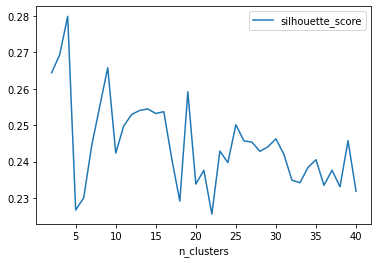

In [59]:
kmeans_scores.plot()

In [60]:
factor_clusters = pd.DataFrame({"cluster" : labels_kmeans[4]}, index=returns.columns)

In [61]:
grouped_df = factor_clusters.groupby('cluster').apply(lambda x: x.index.tolist())
grouped_df

new_df = pd.DataFrame(grouped_df.tolist()).T

# Generate column names based on the number of clusters
column_names = [f'Cluster {i+1}' for i in range(new_df.shape[1])]

# Rename the columns
new_df.columns = column_names
new_df.head(60)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,A,APA,AAL,AAP
1,AAPL,BKR,AFL,ABBV
2,ADBE,CF,AIG,ABC
3,ADI,COP,ALB,ABT
4,ADSK,CTRA,ALK,ACGL
5,ALGN,CVX,AMP,ACN
6,AMAT,DVN,AOS,ADM
7,AMD,EOG,APTV,ADP
8,AMZN,EQT,AVY,AEE
9,ANET,FANG,AXP,AEP


Mean loading/correlation by industry


/tmp/ipykernel_258389/4037968032.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(weights.groupby('Sector').mean().drop(columns=["SectorCode","Capitalization"]).abs(), cmap='YlGnBu', annot=True)


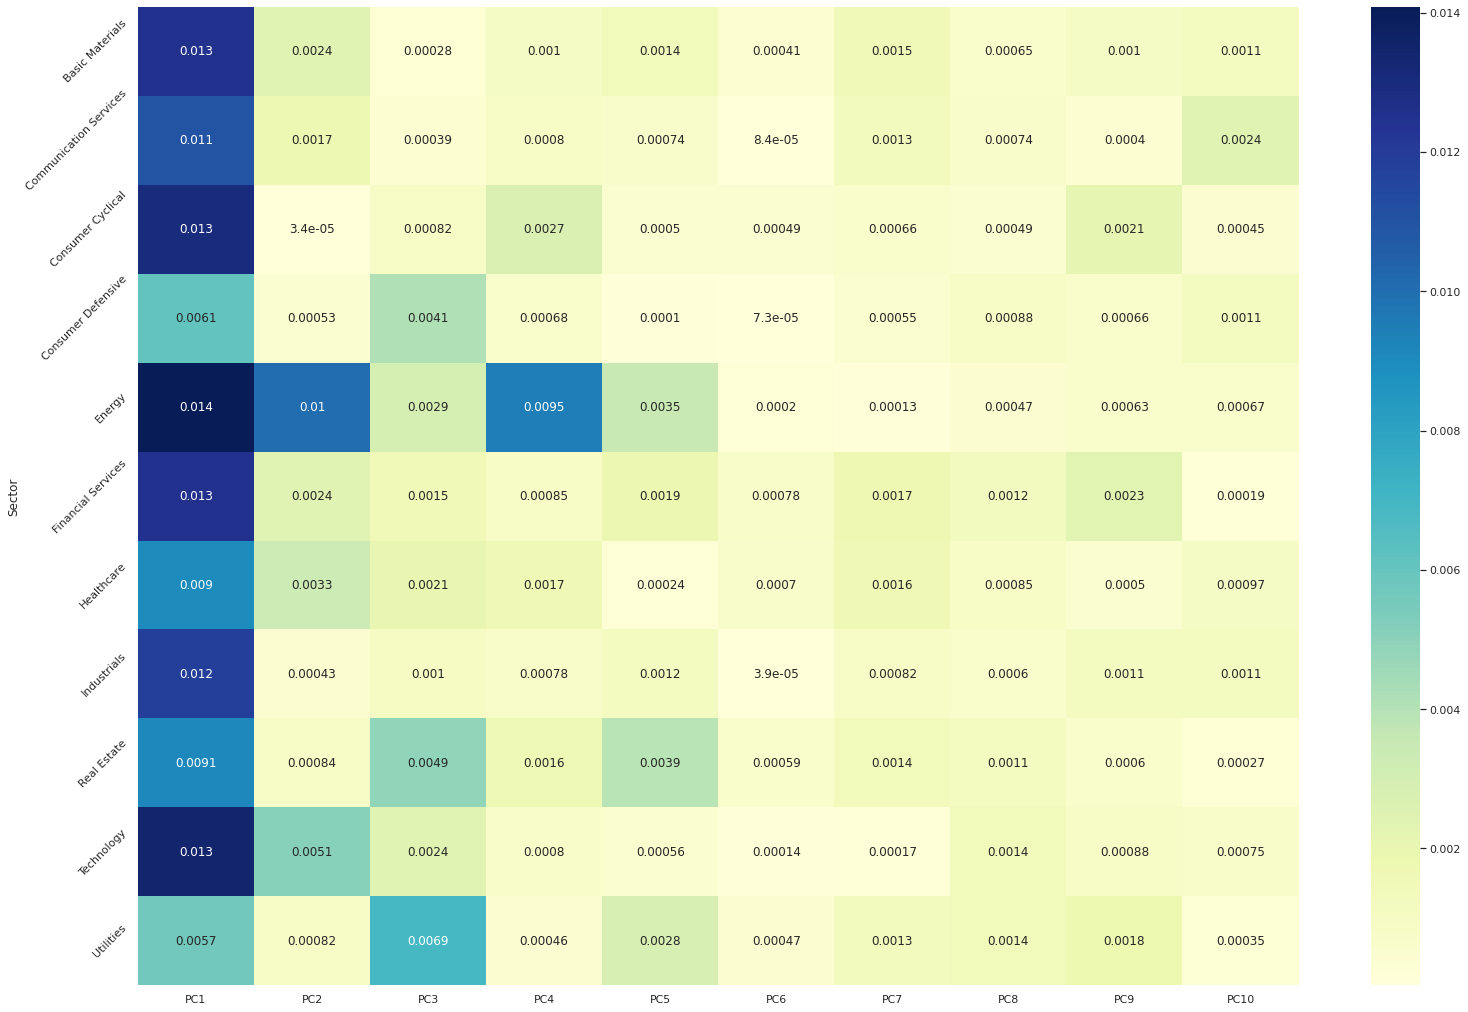

In [101]:
weights = wghts.join(snp_cluster)

print('Mean loading/correlation by industry')
# Draw as heatmap
fig, ax = plt.subplots(figsize=(26,18))
sns.set()
sns.heatmap(weights.groupby('Sector').mean().drop(columns=["SectorCode","Capitalization"]).abs(), cmap='YlGnBu', annot=True)
plt.yticks(rotation=45)
plt.show()